<a href="https://colab.research.google.com/github/manthanthakker/DeepNeuralNetworks/blob/master/FashionMNISTUsingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Dataset trained using FeedForward NN and Convolution NN

1.   CNN
2.   FeedForward



In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torchvision.transforms as transforms
import torch
import torch.nn as nn

Read Datasets and transform to tensor 

In [54]:
train_dataset = dsets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw





Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [57]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

Explore

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')

tensor([9, 0, 0,  ..., 3, 0, 5])


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

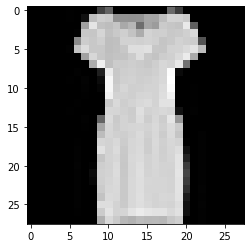

In [71]:
show(train_dataset.data[90])
show(train_dataset.data[20])

print(train_dataset.targets)
train_dataset

NNType: Convolution Neural


1.   Define the CNN architecture
2.   Select loss function
3.   Select optimizer
4.   Make datasets iterable
5.   Train 
6.   Test



Training and Testing for Convolutional Neural Network

In [62]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

## Create an instance of NN
model = CNNModel()

## Check params
print(model.parameters())
print(len(list(model.parameters())))
# FC 1 Parameters 
print(list(model.parameters())[0].size())
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
# FC 2 Parameters
print(list(model.parameters())[2].size())
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())


## Select a Loss Function
criterion = nn.CrossEntropyLoss()
learning_rate = 0.10

## Select an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.09)  

num_epochs=80
iter = 0

data=train_dataset.data

batch_size = 600
n_iters = 100
num_epochs = n_iters / (len(train_dataset) / batch_size)*2
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

## Training...
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities

        #print(images)
        images = images.requires_grad_()
        #labels=train_dataset.train_labels

        #print(images.shape)
        #break
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
      
        # Getting gradients w.r.t. parameters
        loss.backward()
       
        # Updating parameters
        optimizer.step()

        iter += 1
        
        if iter % 5 == 0:
          # Calculate Accuracy         
          correct = 0
          total = 0
          # Iterate through test dataset
          for images, labels in test_loader:
              # Load images
              images = images.requires_grad_()
              
              # Forward pass only to get logits/output
              outputs = model(images)
              
              # Get predictions from the maximum value
              _, predicted = torch.max(outputs.data, 1)
              
              # Total number of labels
              total += labels.size(0)
              
              # Total correct predictions
              correct += (predicted == labels).sum()
          
          accuracy = 100 * correct / total
              # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {}.'.format(iter, loss.item(),accuracy))

<generator object Module.parameters at 0x7fe8240040a0>
6
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
Iteration: 5. Loss: 2.1694655418395996. Accuracy: 41.
Iteration: 10. Loss: 1.8226900100708008. Accuracy: 18.
Iteration: 15. Loss: 1.7401975393295288. Accuracy: 53.
Iteration: 20. Loss: 1.4638408422470093. Accuracy: 50.
Iteration: 25. Loss: 1.4704984426498413. Accuracy: 64.
Iteration: 30. Loss: 1.3227393627166748. Accuracy: 59.
Iteration: 35. Loss: 0.8608920574188232. Accuracy: 66.
Iteration: 40. Loss: 1.0503071546554565. Accuracy: 68.
Iteration: 45. Loss: 0.9342146515846252. Accuracy: 66.
Iteration: 50. Loss: 0.8413082957267761. Accuracy: 71.
Iteration: 55. Loss: 0.9053203463554382. Accuracy: 72.
Iteration: 60. Loss: 0.7720800042152405. Accuracy: 71.
Iteration: 65. Loss: 0.6921757459640503. Accuracy: 72.
Iteration: 70. Loss: 0.7726670503616333. Accuracy: 71.
Iteration: 75. Loss: 0.8956863284111023. Accuracy: 72.
Iteration: 80. Loss: 0.636746168

NNType: FeedForward Neural




1.   Define the CNN architecture
2.   Select loss function
3.   Select optimizer
4.   Make datasets iterable
5.   Train
6.   Test







In [63]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out



input_dim = 28*28
hidden_dim = 28*2
output_dim = 10

## Create an instance of NN
model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

## Select a Loss Function
criterion = nn.CrossEntropyLoss()
learning_rate = 0.10

## Select an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.09)  

num_epochs=500
iter = 0

data=train_dataset.data.numpy().reshape(60000,784)

## Training...
for epoch in range(num_epochs):

        # Load images with gradient accumulation capabilities

        images = torch.from_numpy(data).float().requires_grad_()
        labels=train_dataset.train_labels

        #print(images.shape)
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
      
        # Getting gradients w.r.t. parameters
        loss.backward()
       
        # Updating parameters
        optimizer.step()

        iter += 1
        
        if iter % 50 == 0:
              # Print Loss
            print('Iteration: {}. Loss: {}'.format(iter, loss.item()))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Iteration: 50. Loss: 0.971230685710907
Iteration: 100. Loss: 0.7214902639389038
Iteration: 150. Loss: 0.6241992712020874
Iteration: 200. Loss: 0.5673993229866028
Iteration: 250. Loss: 0.5352330803871155
Iteration: 300. Loss: 0.5269184708595276
Iteration: 350. Loss: 0.48353591561317444
Iteration: 400. Loss: 0.44956132769584656
Iteration: 450. Loss: 0.4396604597568512
Iteration: 500. Loss: 0.4702751636505127


Test for NNFeedForward Neural Network

Thats a {} Trouser
Iteration: 500. Loss: 0.4702751636505127. Accuracy: 81


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


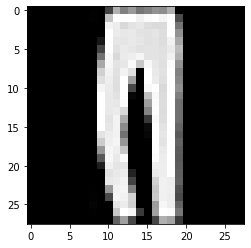

In [99]:
with torch.no_grad():
          # Calculate Accuracy   
          
          correct = 0
          total = 0

          objLabels = {
          0:	"T-shirt/top",
          1 :	"Trouser",
          2	:"Pullover",
          3:	"Dress",
          4:	"Coat",
          5:	"Sandal",
          6:"	Shirt",
          7:	"Sneaker",
          8:	"Bag",
          9:	"Ankle boot"
          }

          tData=test_dataset.data.numpy().reshape(test_dataset.data.shape[0],784)

          # Iterate through test dataset
          test_images = torch.from_numpy(tData)
          test_target=test_dataset.test_labels

          # Forward pass only to get logits/output
          outputs = model(test_images.float())
          
          #print(outputs.data)
          # # Get predictions from the maximum value
          _, predicted = torch.max(outputs.data, 1)

          show(test_dataset.data[2])
          print("Thats a {}",objLabels[predicted[2].numpy().item()])
         
          # Total number of labels
          total += test_target.size(0)
          
          # Total correct predictions
          correct += (predicted == test_target).sum()
          
          accuracy = 100 * correct / total
          print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [0]:
x = thisdict[2]